### Import Libraries

In [1]:
from collections import Counter 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.metrics import classification_report, confusion_matrix

### Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = "/content/drive/MyDrive/text mining group/dataset/NERC_dataset/ner_dataset.csv"

In [4]:
data = pd.read_csv(data_path, encoding="latin1")

In [5]:
data.count()

Sentence #      47959
Word          1048575
POS           1048575
Tag           1048575
dtype: int64

In [6]:
data[100:300]

,Sentence #,Word,POS,Tag
100,NaN,the,DT,O
101,NaN,southern,JJ,O
102,NaN,English,JJ,B-gpe
103,NaN,seaside,NN,O
104,NaN,resort,NN,O
...,...,...,...,...
295,NaN,.,.,O
296,Sentence: 14,Two,CD,O
297,NaN,Germans,NNS,B-gpe
298,NaN,and,CC,O


In [7]:
len(data)

1048575

In [8]:
df_train = data[:100000]

In [9]:
training_features = []
training_gold_labels = []

for index, instance in df_train.iterrows():    
    a_dict = {
        'words': instance['Word'],
        #'pos': instance['POS']
    }
    training_features.append(a_dict)
    training_gold_labels.append(instance['Tag'].upper())

In [10]:
test_data = pd.read_table(r"/content/drive/MyDrive/text mining group/test/NER-final-test.tsv", encoding="latin1")

In [11]:
test_data

,sentence id,token id,token,BIO NER tag
0,0,0,It,O
1,0,1,took,O
2,0,2,eight,O
3,0,3,years,O
4,0,4,for,O
...,...,...,...,...
209,9,12,get,O
210,9,13,into,O
211,9,14,this,O
212,9,15,one,O


In [12]:
df_test = test_data

In [13]:
test_features = []
test_gold_labels = []

for index, instance in df_test.iterrows():    
    a_dict = {
        'words': instance['token'],
        #'pos': instance['POS']
    }
    test_features.append(a_dict)
    test_gold_labels.append(instance['BIO NER tag'])

In [14]:
len(training_gold_labels)

100000

In [15]:
len(test_gold_labels)

214

In [16]:
training_gold_labels

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-GEO',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-GEO',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-GPE',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-PER',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-GEO',
 'I-GEO',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-GEO',
 'O',
 'O',
 'B-ORG',
 'I-ORG',
 'O',
 'O',
 'O',
 'B-GPE',
 'O',
 'O',
 'O',
 'B-GEO',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-GPE',
 'O',
 'O',
 'O',
 'O',
 'B-GEO',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-GPE',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-GEO',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-GEO',
 'O',
 'B-GEO',
 'O',
 'O',
 'B-GEO',
 'O',
 'O',
 'B-

In [17]:
test_gold_labels

['O',
 'O',
 'O',
 'O',
 'O',
 'B-ORG',
 'I-ORG',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-ORG',
 'I-ORG',
 'I-ORG',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-LOC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-MISC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-PER',
 'I-PER',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-PER',
 'I-PER',
 'O',
 'O',
 'B-PER',
 'I-PER',
 'I-PER',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-MISC',
 'I-MISC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-ORG',
 'O',
 'B-PER',
 'I-PER',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-LOC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-ORG',
 

In [18]:
print(training_features[:1])
print(training_gold_labels[:1])
print(test_features)
print(test_gold_labels)

[{'words': 'Thousands'}]
['O']
[{'words': 'It'}, {'words': 'took'}, {'words': 'eight'}, {'words': 'years'}, {'words': 'for'}, {'words': 'Warner'}, {'words': 'Brothers'}, {'words': 'to'}, {'words': 'recover'}, {'words': 'from'}, {'words': 'the'}, {'words': 'disaster'}, {'words': 'that'}, {'words': 'was'}, {'words': 'this'}, {'words': 'movie'}, {'words': '.'}, {'words': 'All'}, {'words': 'the'}, {'words': 'New'}, {'words': 'York'}, {'words': 'University'}, {'words': 'students'}, {'words': 'love'}, {'words': 'this'}, {'words': 'diner'}, {'words': 'in'}, {'words': 'Soho'}, {'words': 'so'}, {'words': 'it'}, {'words': 'makes'}, {'words': 'for'}, {'words': 'a'}, {'words': 'fun'}, {'words': 'young'}, {'words': 'atmosphere'}, {'words': '.'}, {'words': 'This'}, {'words': 'Italian'}, {'words': 'place'}, {'words': 'is'}, {'words': 'really'}, {'words': 'trendy'}, {'words': 'but'}, {'words': 'they'}, {'words': 'have'}, {'words': 'forgotten'}, {'words': 'about'}, {'words': 'the'}, {'words': 'most'}, 

In [19]:
num_instances_train = len(training_features)
num_instances_test = len(test_features)

In [20]:
num_instances_train

100000

In [21]:
num_instances_test

214

In [22]:
frequency_label_train = Counter(training_gold_labels)
frequency_label_train

Counter({'O': 84725,
         'B-GEO': 3303,
         'B-GPE': 1740,
         'B-PER': 1668,
         'I-GEO': 690,
         'B-ORG': 1876,
         'I-ORG': 1470,
         'B-TIM': 1823,
         'B-ART': 75,
         'I-ART': 43,
         'I-PER': 1846,
         'I-GPE': 51,
         'I-TIM': 549,
         'B-NAT': 30,
         'B-EVE': 53,
         'I-EVE': 47,
         'I-NAT': 11})

<BarContainer object of 17 artists>

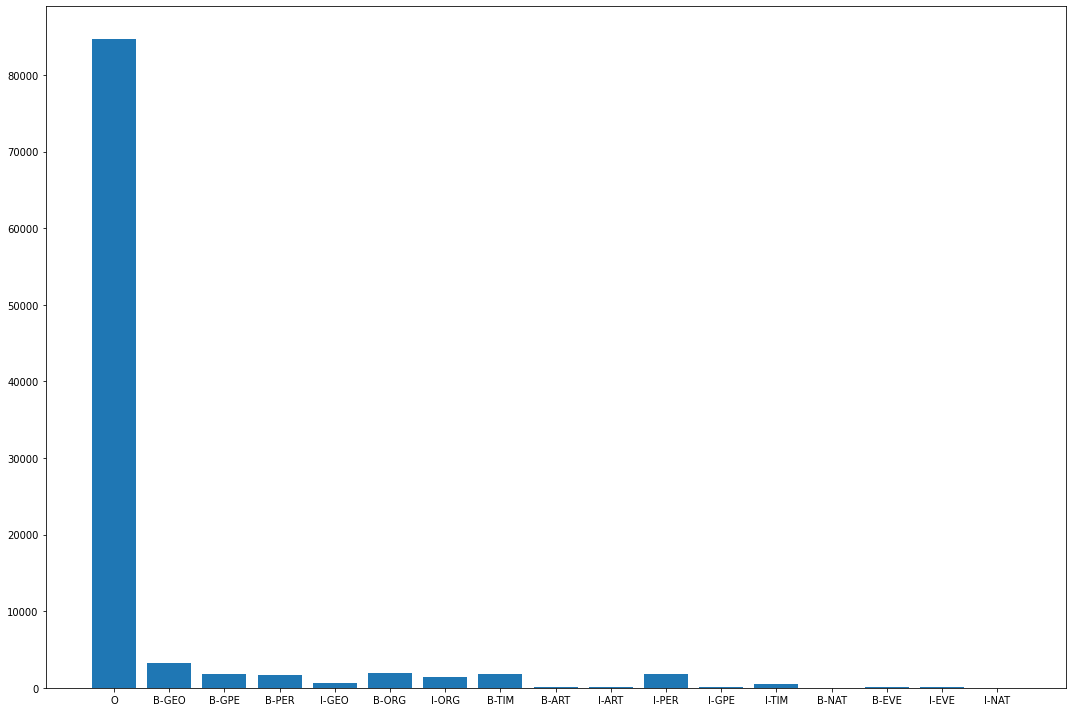

In [23]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
plt.bar(frequency_label_train.keys(), frequency_label_train.values())

In [24]:
frequency_label_test = Counter(test_gold_labels)
frequency_label_test

Counter({'O': 183,
         'B-ORG': 4,
         'I-ORG': 3,
         'B-LOC': 4,
         'B-MISC': 3,
         'B-PER': 6,
         'I-PER': 8,
         'I-MISC': 1,
         'I-LOC': 2})

<BarContainer object of 9 artists>

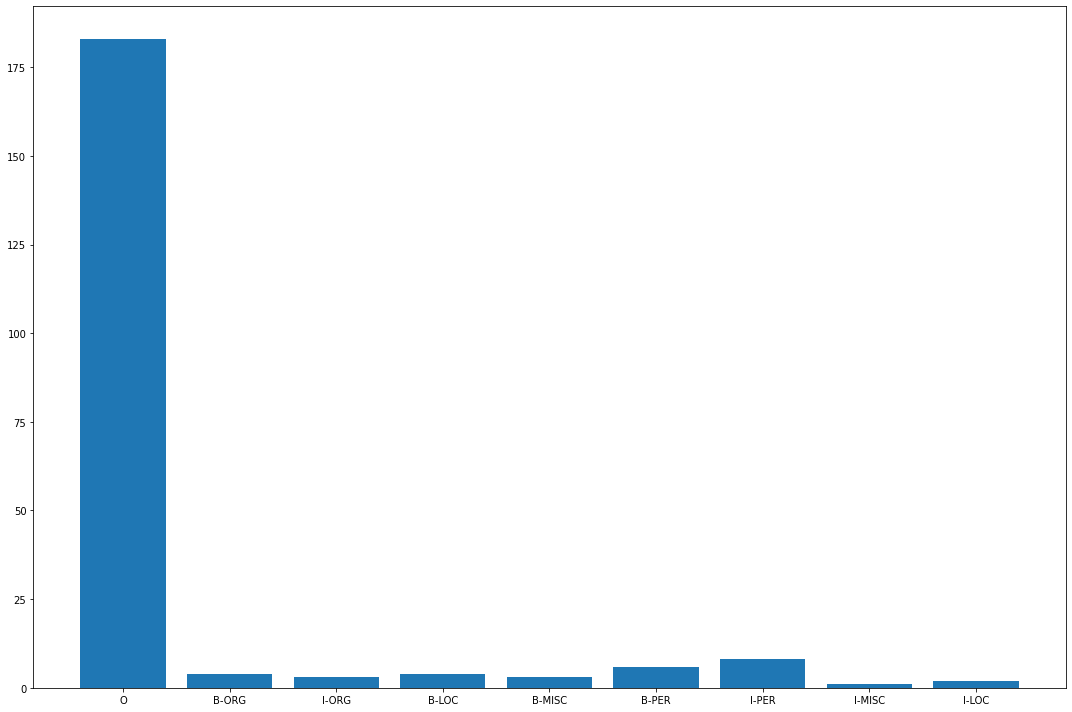

In [25]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
plt.bar(frequency_label_test.keys(), frequency_label_test.values())

In [26]:
all_features = training_features + test_features

In [27]:
from sklearn.feature_extraction import DictVectorizer

In [28]:
vec = DictVectorizer()
the_array = vec.fit_transform(all_features).toarray() 

In [29]:
training_onehot = the_array[:len(training_features)]
test_onehot = the_array[len(training_features):]

In [30]:
print('Number of training words =', training_onehot.shape)
print('Number of test words =', test_onehot.shape)

Number of training words = (100000, 10955)
Number of test words = (214, 10955)


In [31]:
training_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
test_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Training with SVM

In [33]:
from sklearn import svm

In [34]:
lin_clf = svm.LinearSVC()

In [35]:
lin_clf.fit(training_onehot, training_gold_labels)

LinearSVC()

In [36]:
pred = lin_clf.predict(test_onehot)
print(pred)

['O' 'O' 'O' 'O' 'O' 'I-PER' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'B-GEO' 'I-GEO' 'I-ORG' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'B-GPE' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'B-GEO' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'B-GPE' 'B-GPE' 'O' 'O' 'O' 'O' 'O' 'B-ORG' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'I-TIM' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'I-PER' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'B-PER' 'O' 'O' 'O' 'O'
 'B-GEO' 'I-GEO' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'B-GEO' 'I-GEO' 'O' 'O' 'O'
 'O' 'O' 'B-GPE' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']


In [38]:
pred[:5]

array(['O', 'O', 'O', 'O', 'O'], dtype='<U5')

### Analysis 

In [39]:
from sklearn.metrics import classification_report
report = classification_report(test_gold_labels, pred)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [40]:
report

'              precision    recall  f1-score   support\n\n       B-GEO       0.00      0.00      0.00         0\n       B-GPE       0.00      0.00      0.00         0\n       B-LOC       0.00      0.00      0.00         4\n      B-MISC       0.00      0.00      0.00         3\n       B-ORG       1.00      0.25      0.40         4\n       B-PER       1.00      0.17      0.29         6\n       I-GEO       0.00      0.00      0.00         0\n       I-LOC       0.00      0.00      0.00         2\n      I-MISC       0.00      0.00      0.00         1\n       I-ORG       1.00      0.33      0.50         3\n       I-PER       0.50      0.12      0.20         8\n       I-TIM       0.00      0.00      0.00         0\n           O       0.92      0.99      0.96       183\n\n    accuracy                           0.87       214\n   macro avg       0.34      0.14      0.18       214\nweighted avg       0.87      0.87      0.85       214\n'

In [41]:
cm = confusion_matrix(test_gold_labels,pred)
cm

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   1,   0,   0,   0,   0,   0,   1,   0,   1],
       [  1,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   4],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   7],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1, 182]])

Text(6.800000000000001, 0.5, 'Actual')

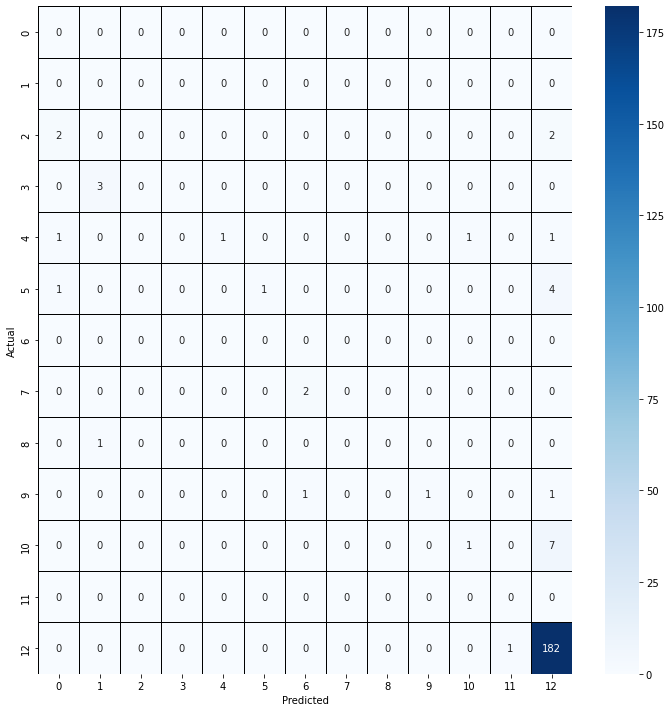

In [42]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' )
plt.xlabel("Predicted")
plt.ylabel("Actual")